# Brownia Motion or Wiener process in Finance

The following variables will be always defined as:

$$ W_{t} \sim N(0, t) $$

$$ dW_{t} \sim N(0, dt) $$

$$ dW_{t}dt = 0 $$

$$ dW_{t}dW_{t} = dt $$

$$ dW_{t}dW_{s} = 0 $$

#  Arithmetic Brownian Motion

Suppose a variable $S_t$ follows has the following dynamic.

$$ dS_{t} = \mu dt + \sigma dW_{t} $$

Solving it for $S_{t}$ 

$$ \int_{s}^{t} dS_{u} = \int_{s}^{t}\mu du + \sigma dW_{u} $$

$$ S_{t} - S_{s} = \mu \left(t-s\right) + \sigma W_{t-s} $$

$$ S_{t}  = S_{s} + \mu \left(t-s\right) + \sigma W_{t-s} \sim N\left(S_{s} + \mu \left(t-s\right), \ \sigma W_{t-s} \right) $$



In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Latex
sns.set()



In [2]:
def brownian_motion(time_points, num_sim=1):
    """
    create a Standard Wiener Process from a grid of time points with mu =0.0 and sigma 11
    time_points: t_1, ...,t_n
    """
    # get number of time points
    no_times = len(time_points)
    # generate no_times-1 (exclude time 0) normally distributed random variables \varepsilon_epsilon = np.random.normal(0,1,(no_times-1,))
    epsilon = np.random.normal(0,1,(num_sim, no_times-1))
    # compute t_1 - t_0, t2 - t1, ..., t_{n}-t_{n-1}
    dt = time_points[1:] - time_points[:-1]
    # create empty process for no_times timepoints
    wp = np.zeros((num_sim, no_times))
    # compute \sqrt{t_1 - t_0}\varepsilon_1, \sqrt{t2 - t1}\varepsilon_2, ..., \sqrt{t_{wp[1:] = np.sqrt(dt) * epsilon
    wp[:,1:] = np.kron(np.sqrt(dt),np.ones((num_sim,1))) * epsilon
    # make it into a process using cumulative sum
    
    return wp


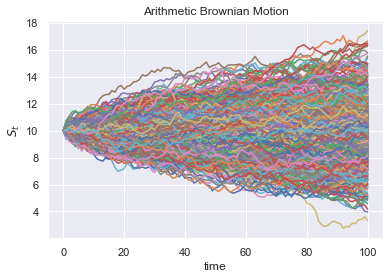

In [63]:
def arithmetic_brownian_motion(time_points, mu=0, sigma=1, s0=0, num_sim=1):
    no_times = len(time_points)
    dt = time_points[1:] - time_points[:-1]
    cumulative_deviation = np.ones((num_sim, no_times)) * s0
    cumulative_deviation[:,1:] = s0 + np.cumsum((mu*dt 
                                                      + sigma*brownian_motion(time_points, num_sim)[:, 1:]),
                                               axis=1)
    return cumulative_deviation

start_time = 0
end_time = 100

#create time points at which you want to view the Process
time_points = np.arange(start_time,end_time+1)

sp = arithmetic_brownian_motion(time_points, 0, 0.2, 10,1000)
plt.plot(time_points, sp.T)
plt.title('Arithmetic Brownian Motion')
plt.xlabel('time')
plt.ylabel('$S_{t}$')
plt.show()


#  Geometric Brownian Motion

Suppose a variable $S_t$ follows has the following dynamic.

$$ \frac{dS_{t}}{S_{t}} = \mu dt + \sigma dW_{t} $$

$$ dS_{t} = S_{t}\mu dt + S_{t}\sigma dW_{t} $$

It is not difficult to see that the first equation is similar to the next one.

$$ \frac{\partial ln(x)}{\partial x} = \frac{1}{x} \frac{\partial x}{\partial x} $$

Doing a variable transformation and using the Ito's lemma.

$$ dln(S_{t}) = \underbrace{\frac{\partial ln(S_{t})}{\partial t }}_{ = 0} dt + \frac{\partial ln(S_{t})}{\partial S_{t} }dS_{t} + \frac{1}{2} \frac{\partial^2 ln(S_{t}) }{\partial S_{t}^2  } \left(dS_{t}\right)^2 $$

$$  \frac{\partial ln(S_{t})}{\partial S_{t}} = \frac{1}{S_{t}} \underbrace{\frac{\partial S_{t}}{\partial S_{t}}}_{ = 1} = \frac{1}{S_{t}} $$

$$ \frac{\partial^2 ln(S_{t}) }{\partial S_{t}^2 } =  \frac{\partial \frac{1}{S_{t}}}{\partial S_{t}} = - \frac{1}{S_{t}^2}$$

$$ \left(dS_{t}\right)^2 = \left( S_{t}\mu dt + S_{t}\sigma dW_{t} \right)^2 =  \left(S_{t}\mu\right)^2 \underbrace{dtdt}_{= 0} + 2\mu\sigma S_{t} \underbrace{dW_{t}dt}_{= 0} + \sigma^2 S_{t} \underbrace{dW_{t}dW_{t}}_{= dt} $$

$$ \left(dS_{t}\right)^2 = \sigma^2 S_{t}^2 dt $$

Pluggin these results in the main equation

$$ dln(S_{t}) = \frac{1}{S_{t}} dS_{t} - \frac{1}{2} \frac{1}{S_{t}^2} \sigma^2 dt $$

Replacing $dS_t$

$$ dln(S_{t}) = \frac{S_{t}\mu dt + S_{t}\sigma dW_{t}}{S_{t}} - \frac{1}{2} \frac{1}{S_{t}^2} S_{t}^2 \sigma^2 dt $$

$$ dln(S_{t}) = \mu dt + \sigma dW_{t} - \frac{1}{2}\sigma^2 dt $$

$$ dln(S_{t}) = \left( \mu - \frac{1}{2}\sigma^2 \right) dt + \sigma dW_{t}  $$

Solving for $S_t$

$$ \int_{s}^{t} dln(S_{u}) = \int_{s}^{t} \left( \mu - \frac{1}{2}\sigma^2 \right) du + \sigma dW_{u}  $$

$$ ln(S_{t}) - ln(S_{s}) = \left( \mu - \frac{1}{2}\sigma^2 \right) \left( t-s\right) + \sigma W_{t-s} \sim N\left(\left( \mu - \frac{1}{2}\sigma^2 \right) \left( t-s\right), \ \sigma W_{t-s} \right) $$

$$ ln(S_{t})  = ln(S_{s}) + \left( \mu - \frac{1}{2}\sigma^2 \right) \left( t-s\right) + \sigma W_{t-s} $$

$$ S_{t}  = e^{\left( ln(S_{s}) + \left( \mu - \frac{1}{2}\sigma^2 \right) \left( t-s\right) + \sigma W_{t-s} \right)} $$

$$ S_{t}  = S_{s} e^{\left( \left( \mu - \frac{1}{2}\sigma^2 \right) \left( t-s\right) + \sigma W_{t-s} \right)} $$

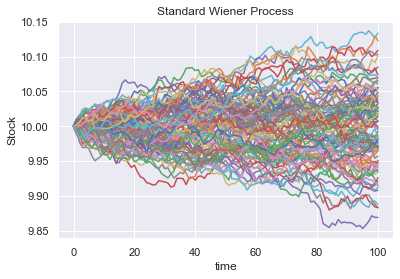

In [19]:
def geometric_brownian_motion(time_points, mu=0, sigma=1, s0=1, num_sim=1):
    no_times = len(time_points)
    dt = time_points[1:] - time_points[:-1]
    cumulative_deviation = np.ones((num_sim, no_times)) * s0
    cumulative_deviation[:,1:] = s0 * np.cumprod(np.exp((mu-0.5*sigma**2)*dt 
                                                      + sigma*brownian_motion(time_points, num_sim)[:, 1:]),
                                               axis=1)
    return cumulative_deviation

sp = geometric_brownian_motion(time_points, 0, 0.2/360, 10,100)
plt.plot(time_points, sp.T)
plt.title('Standard Wiener Process')
plt.xlabel('time')
plt.ylabel('Stock')
plt.show()

# Estimation using market data

In [32]:
ff = web.DataReader("F-F_Research_Data_Factors", "famafrench")[0]['Mkt-RF']/100

def prices_from_arithmetic_returns(returns, first_price=1):
    """Convert the arithmetic returns to price"""
    prices = np.zeros(len(returns) + 1)
    prices[0] = first_price
    prices[1:] = np.cumprod((returns+1))*prices[0]
    return prices

def log_return(prices):
    """Convert prices to log returns"""
    return np.log(prices[1:]/prices[:-1])

#Calculate the log returns
log_ff = log_return(prices_from_arithmetic_returns(ff))

mu = np.mean(log_ff)
sigma = np.std(log_ff)

m = (mu-0.5*sigma**2)

print("The monthly estimators")
display(Markdown("$\mu = %s $" % round(mu,4)))
display(Markdown("$\sigma = %s $" % round(sigma,4)))
display(Markdown("$ m = %s $" % round(m,4)))



The monthly estimators


$\mu = 0.0123 $

$\sigma = 0.0455 $

$ m = 0.0112 $

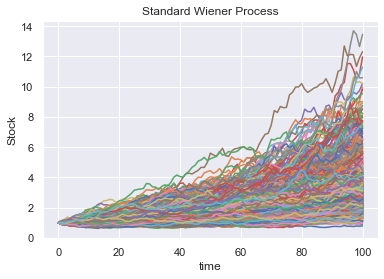

In [50]:
sp = geometric_brownian_motion(time_points, mu, sigma, 1,1000)
plt.plot(time_points, sp.T)
plt.title('Standard Wiener Process')
plt.xlabel('time')
plt.ylabel('Stock')
plt.show()

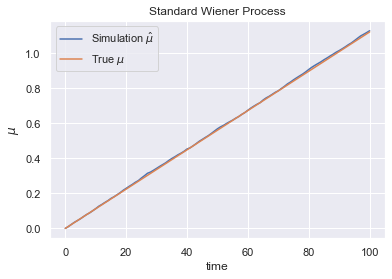

In [60]:
mean_sp = np.mean(np.log(sp/sp[0,0]),axis=0)
true_mean = m * time_points

plt.plot(time_points, mean_sp, label="Simulation $\hat\mu$")
plt.plot(time_points, true_mean, label="True $\mu$")
plt.title('Standard Wiener Process')
plt.xlabel('time')
plt.ylabel('$\mu$')
plt.legend()
plt.show()

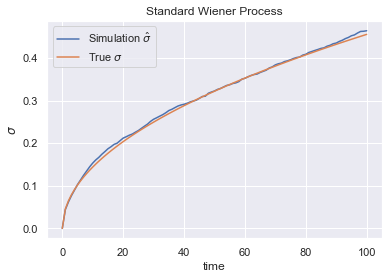

In [61]:
std_sp = np.std(np.log(sp/sp[0,0]),axis=0)
true_std = sigma * np.sqrt(time_points)

plt.plot(time_points, std_sp, label="Simulation $\hat\sigma$")
plt.plot(time_points, true_std, label="True $\sigma$")
plt.title('Standard Wiener Process')
plt.xlabel('time')
plt.ylabel('$\sigma$')
plt.legend()
plt.show()
